In [51]:
import pandas as pd
df = pd.read_csv (r"C:\Users\Nathan\Documents\WGU\D606\Task 1\AirBnB.csv")

In [52]:
column_headers = df.columns.tolist()
print(column_headers)

['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds']


In [53]:
print("\n--- Shape of the DataFrame (Rows, Columns) ---")
print(df.shape)

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())


--- Shape of the DataFrame (Rows, Columns) ---
(74111, 29)

--- Descriptive Statistics for Numerical Columns ---
                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.39752

In [54]:
columns_to_drop = [
    'name',
    'description',
    'first_review',
    'last_review',
    'id',
    'amenities',
    'neighbourhood']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [49]:
empty_cells = df.isnull().sum()
print(empty_cells)

log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   196
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        186
host_identity_verified      186
host_response_rate        17993
host_since                  186
instant_bookable              0
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16433
thumbnail_url              8097
zipcode                       0
bedrooms                     85
beds                        118
dtype: int64


In [55]:
mode_cols = ['host_has_profile_pic', 'host_identity_verified', 'host_since', 'bathrooms', 'bedrooms', 'beds']
for col in mode_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [56]:
print(df[mode_cols].isnull().sum())

host_has_profile_pic      0
host_identity_verified    0
host_since                0
bathrooms                 0
bedrooms                  0
beds                      0
dtype: int64


In [57]:
rows_before = len(df)
print(f"DataFrame size BEFORE dropping rows: {rows_before} rows")
df.dropna(subset=['zipcode'], inplace=True)
rows_after = len(df)
rows_dropped = rows_before - rows_after
print(f"Dropped {rows_dropped} rows where 'zipcode' was missing.")
print(f"--- DataFrame size AFTER dropping rows: {rows_after} rows ---")

DataFrame size BEFORE dropping rows: 74111 rows
Dropped 966 rows where 'zipcode' was missing.
--- DataFrame size AFTER dropping rows: 73145 rows ---


In [9]:
df['has_thumbnail'] = df['thumbnail_url'].notnull().astype(int)
df.drop('thumbnail_url', axis=1, inplace=True)
print(df['has_thumbnail'].value_counts())

has_thumbnail
1    65048
0     8097
Name: count, dtype: int64


In [10]:
print(df['review_scores_rating'].describe())

count    56712.000000
mean        94.063179
std          7.814818
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64


In [11]:
rating_col = 'review_scores_rating'
df['has_rating'] = df[rating_col].notnull().astype(int)
median_rating = df[rating_col].median()
df[rating_col].fillna(median_rating, inplace=True)

C:\Users\Nathan\AppData\Local\Temp\ipykernel_12132\1404176835.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[rating_col].fillna(median_rating, inplace=True)


In [12]:
host_response_col = 'host_response_rate'
df[host_response_col] = df[host_response_col].astype(str)
df[host_response_col] = df[host_response_col].str.replace('%', '', regex=False)
df[host_response_col] = pd.to_numeric(df[host_response_col], errors='coerce')

In [13]:
df['has_response_rate'] = df[host_response_col].notnull().astype(int)
df[host_response_col].fillna(0.0, inplace=True)

C:\Users\Nathan\AppData\Local\Temp\ipykernel_12132\954169155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[host_response_col].fillna(0.0, inplace=True)


In [15]:
rows_to_drop = df[df['log_price'] == 0].shape[0]

df = df[df['log_price'] != 0]

print(f"Successfully dropped {rows_to_drop} rows where log_price was 0")
print(f"New DataFrame shape: {df.shape}")

Successfully dropped 0 rows where log_price was 0
New DataFrame shape: (73144, 24)


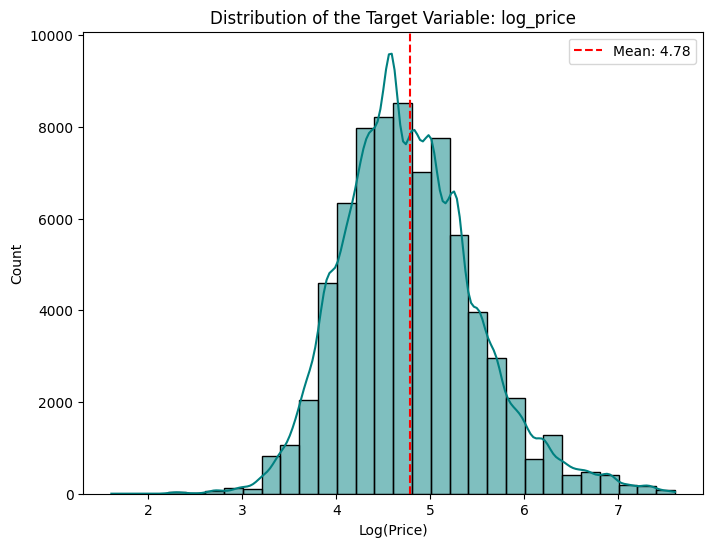


--- Key Statistics for Log Price ---
count    73144.000000
mean         4.781631
std          0.716252
min          1.609438
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'log_price'

plt.figure(figsize=(8, 6))
sns.histplot(df[target_col], kde=True, bins=30, color='teal')
plt.title(f'Distribution of the Target Variable: {target_col}')
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.axvline(df[target_col].mean(), color='red', linestyle='--', label=f'Mean: {df[target_col].mean():.2f}')
plt.legend()
plt.show()

print("\n--- Key Statistics for Log Price ---")
print(df[target_col].describe())

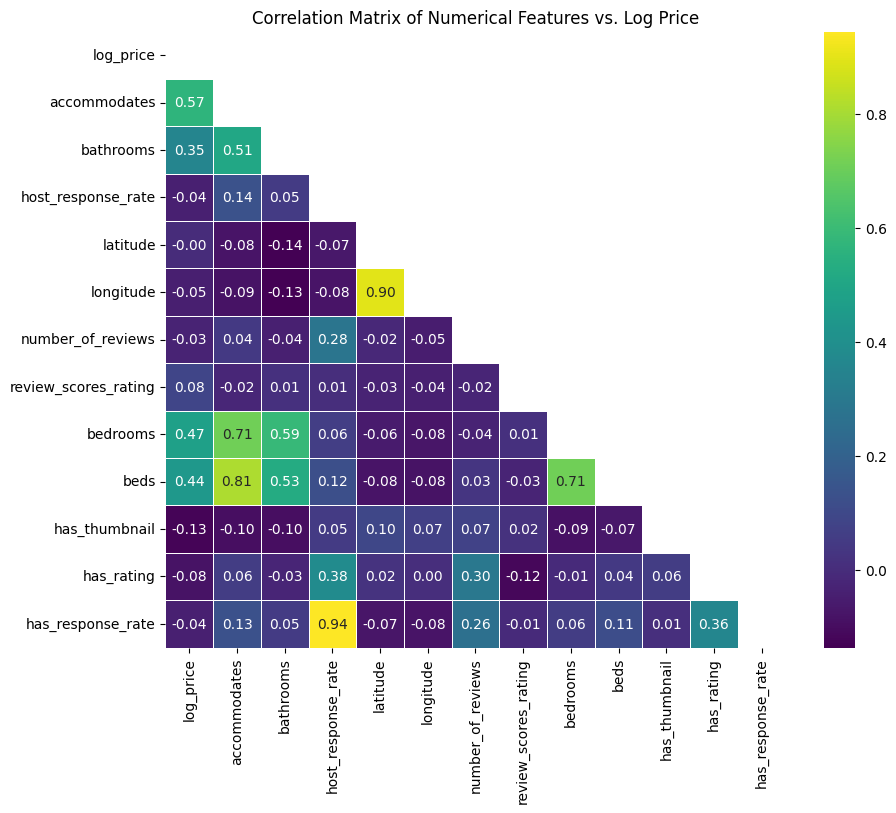

In [17]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

cols_for_corr = [col for col in numerical_cols if col not in ['id', 'log_price']]
cols_for_corr.insert(0, 'log_price')

correlation_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    cbar=True, 
    linewidths=.5,
    mask=np.triu(correlation_matrix)
)
plt.title('Correlation Matrix of Numerical Features vs. Log Price')
plt.show()

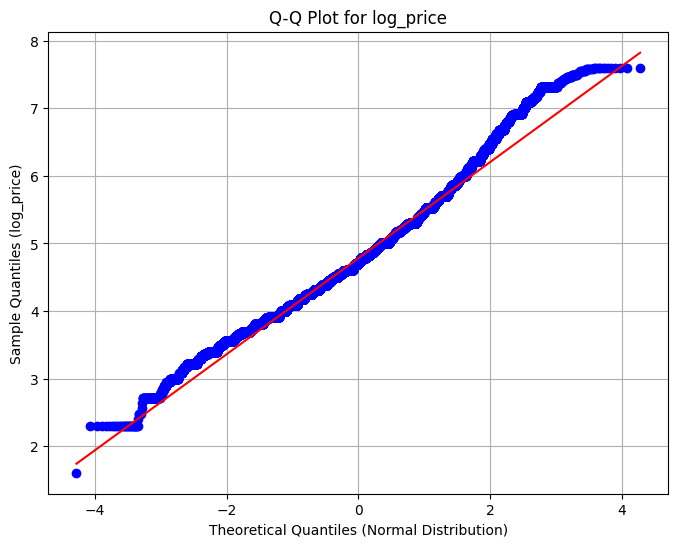

In [18]:
import scipy.stats as stats
target_col = 'log_price'

plt.figure(figsize=(8, 6))
stats.probplot(df[target_col], dist="norm", plot=plt)

plt.title(f'Q-Q Plot for {target_col}')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (log_price)')
plt.grid(True)
plt.show()


Shapiro-Wilk Test conducted on a **random sample of 5,000 observations**.
Shapiro-Wilk Test Statistic (W): 0.9867
Shapiro-Wilk P-Value: 2.7418e-21


C:\Users\Nathan\AppData\Local\Temp\ipykernel_12132\4161966459.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y=target_col, data=df, palette='Pastel1')


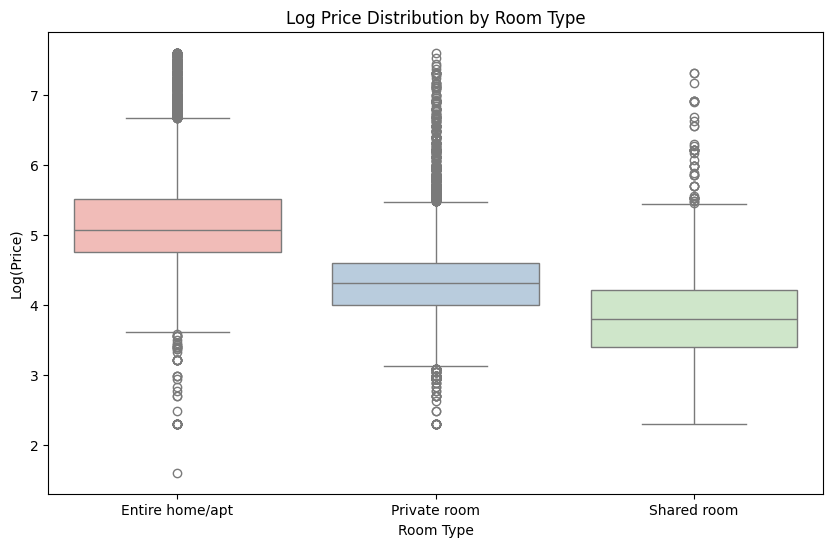

C:\Users\Nathan\AppData\Local\Temp\ipykernel_12132\4161966459.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y=target_col, data=df_top_property, palette='Pastel2')


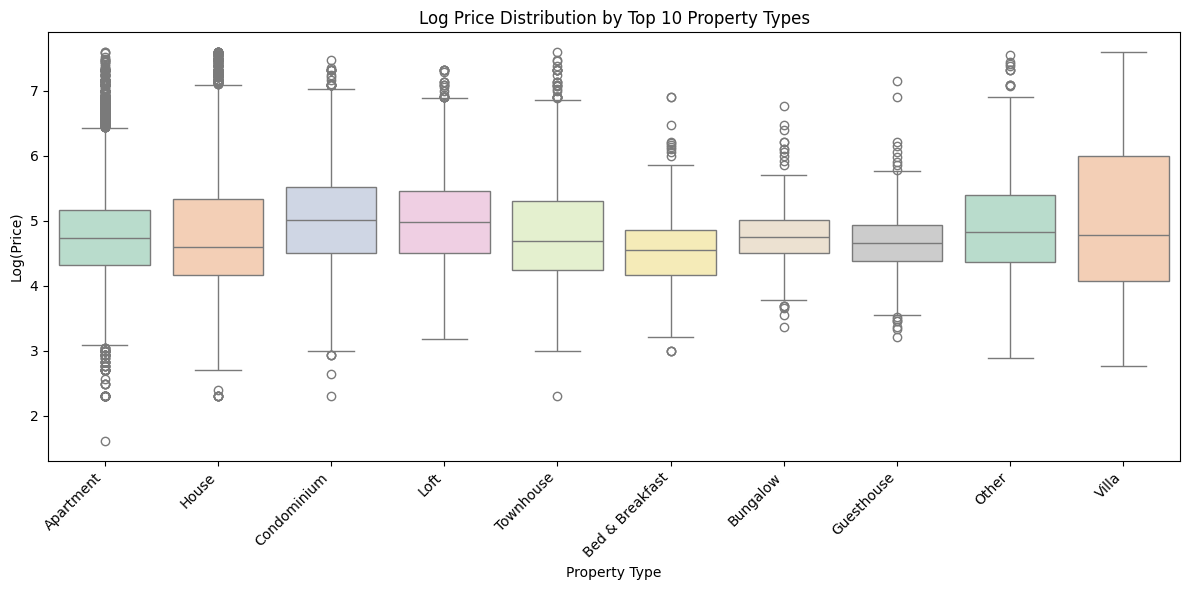

In [19]:
sample = df[target_col].sample(n=5000, random_state=42)
shapiro_test = stats.shapiro(sample)

print("\nShapiro-Wilk Test conducted on a **random sample of 5,000 observations**.")
print(f"Shapiro-Wilk Test Statistic (W): {shapiro_test.statistic:.4f}")
print(f"Shapiro-Wilk P-Value: {shapiro_test.pvalue:.4e}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y=target_col, data=df, palette='Pastel1')
plt.title('Log Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log(Price)')
plt.show()

top_property_types = df['property_type'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
df_top_property = df[df['property_type'].isin(top_property_types)]
sns.boxplot(x='property_type', y=target_col, data=df_top_property, palette='Pastel2')
plt.title('Log Price Distribution by Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Log(Price)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

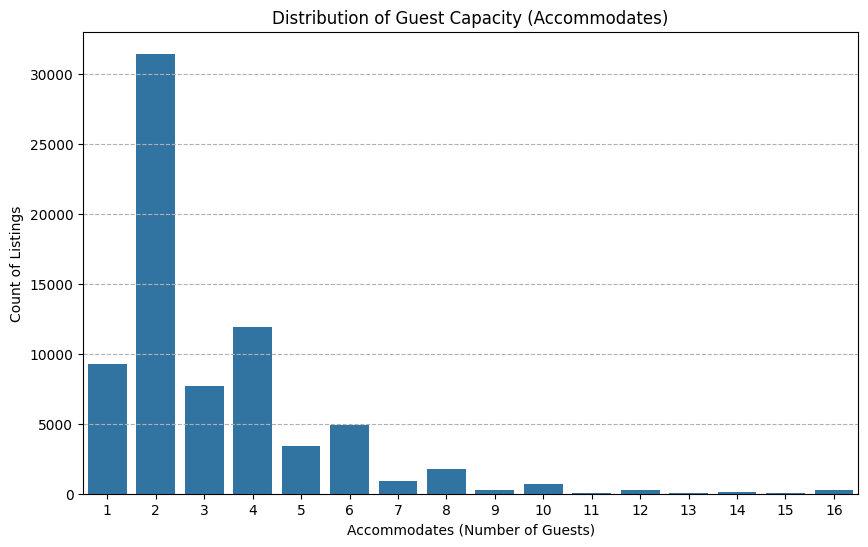

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='accommodates', data=df)

plt.title('Distribution of Guest Capacity (Accommodates)')
plt.xlabel('Accommodates (Number of Guests)')
plt.ylabel('Count of Listings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

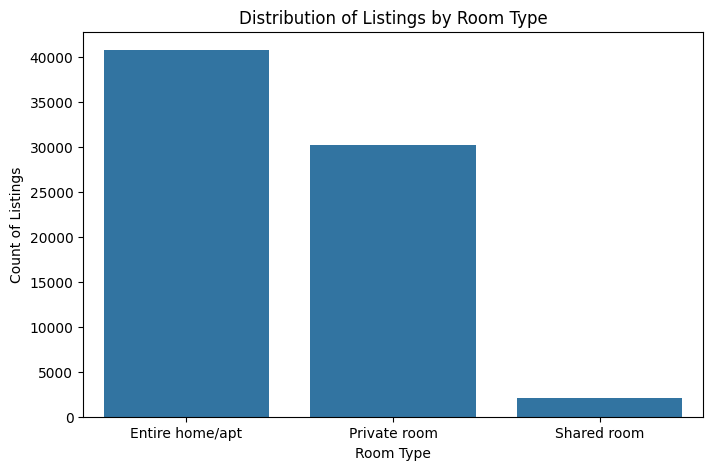

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)

plt.title('Distribution of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count of Listings')
plt.show()

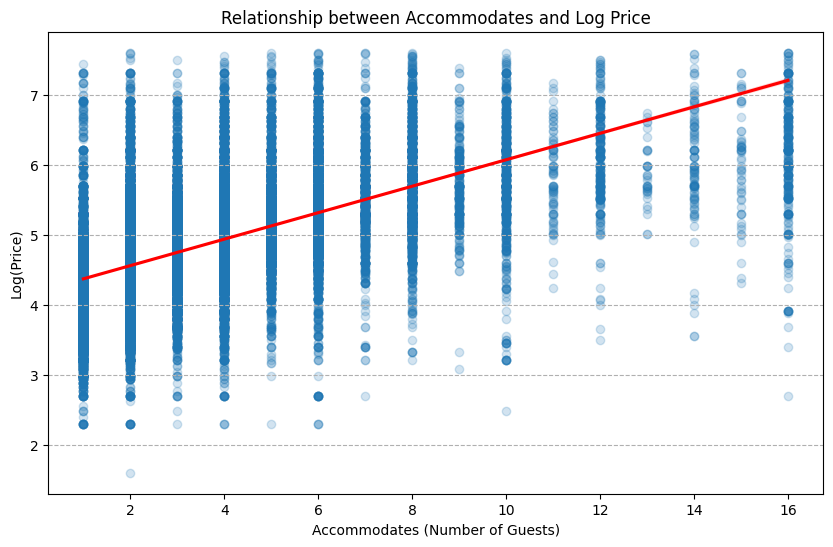

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='accommodates', y='log_price', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})

plt.title('Relationship between Accommodates and Log Price')
plt.xlabel('Accommodates (Number of Guests)')
plt.ylabel('Log(Price)')
plt.grid(axis='y', linestyle='--')
plt.show()

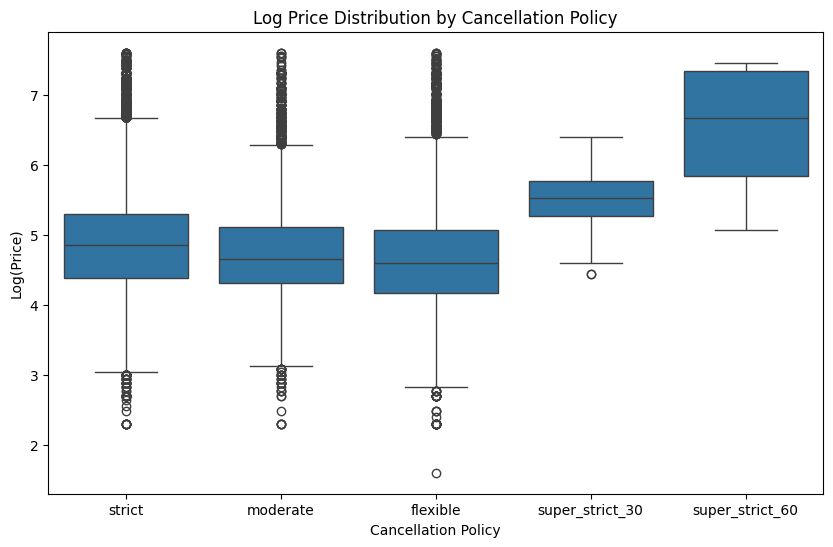

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancellation_policy', y='log_price', data=df)

plt.title('Log Price Distribution by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Log(Price)')
plt.show()

In [24]:
cleaned_filename = 'airbnb_cleaned.csv'

df.to_csv(cleaned_filename, index=False)

print(f"Successfully exported the cleaned dataset to: '{cleaned_filename}'")

Successfully exported the cleaned dataset to: 'airbnb_cleaned.csv'


In [25]:
ohe_cols = ['room_type', 'bed_type', 'cancellation_policy', 'property_type', 'city']

df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

print("Applied One-Hot Encoding to low-cardinality features.")
print(df.head())
print(f"\nNew number of columns: {df.shape[1]}")

Applied One-Hot Encoding to low-cardinality features.
   log_price  accommodates  bathrooms  cleaning_fee host_has_profile_pic  \
0   5.010635             3        1.0          True                    t   
1   5.129899             7        1.0          True                    t   
2   4.976734             5        1.0          True                    t   
3   6.620073             4        1.0          True                    t   
4   4.744932             2        1.0          True                    t   

  host_identity_verified  host_response_rate  host_since instant_bookable  \
0                      t                 0.0  2012-03-26                f   
1                      f               100.0  2017-06-19                t   
2                      t               100.0  2016-10-25                t   
3                      t                 0.0  2015-04-19                f   
4                      t               100.0  2015-03-01                t   

    latitude  ...  propert

In [26]:
binary_cols_to_map = [
    'host_has_profile_pic', 
    'host_identity_verified', 
    'instant_bookable'
]
binary_mapping = {'t': 1, 'f': 0}

for col in binary_cols_to_map:
    
    df[col] = df[col].replace(binary_mapping).fillna(0).astype(int)

print("Successfully mapped 't' to 1 and 'f' to 0 for binary features.")

Successfully mapped 't' to 1 and 'f' to 0 for binary features.


C:\Users\Nathan\AppData\Local\Temp\ipykernel_12132\936630990.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_mapping).fillna(0).astype(int)
C:\Users\Nathan\AppData\Local\Temp\ipykernel_12132\936630990.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_mapping).fillna(0).astype(int)
C:\Users\Nathan\AppData\Local\Temp\ipykernel_12132\936630990.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [27]:
cat_col_zip = 'zipcode'
target_col = 'log_price'

zipcode_mapping = df.groupby(cat_col_zip)[target_col].mean().reset_index()

zipcode_mapping.columns = [cat_col_zip, f'{cat_col_zip}_encoded']

df = df.merge(zipcode_mapping, on=cat_col_zip, how='left')

df.drop(cat_col_zip, axis=1, inplace=True)

print(f"Target Encoding fix: Created '{cat_col_zip}_encoded' using a robust merge approach.")
print("Original 'zipcode' column dropped.")

print("\n--- Verification of New Encoded Feature ---")
print(df[f'{cat_col_zip}_encoded'].head())

Target Encoding fix: Created 'zipcode_encoded' using a robust merge approach.
Original 'zipcode' column dropped.

--- Verification of New Encoded Feature ---
0    5.009599
1    5.184469
2    4.656553
3    5.132011
4    5.030781
Name: zipcode_encoded, dtype: float64


In [28]:
encoded_filename = 'airbnb_encoded.csv'
df.to_csv(encoded_filename, index=False)

In [29]:
from sklearn.model_selection import train_test_split
y = df['log_price']
cols_to_drop = ['log_price'] 

X = df.drop(columns=cols_to_drop, errors='ignore') 

X = X.select_dtypes(include=np.number)

print("Defined X (Features) and y (Target)")

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("\n--- Data Split Complete ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Defined X (Features) and y (Target)

--- Data Split Complete ---
X_train shape: (58515, 16)
X_test shape: (14629, 16)
y_train shape: (58515,)
y_test shape: (14629,)


In [30]:
print("--- NaN Check on X_train ---")
nan_count_train = X_train.isnull().sum().sum() 
print(f"Total NaN count in X_train: {nan_count_train}")

if nan_count_train > 0:
    print("\nColumns in X_train with NaNs:")
    print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
else:
    print("X_train is completely clean (0 NaNs).")


print("\n--- NaN Check on X_test ---")
nan_count_test = X_test.isnull().sum().sum()
print(f"Total NaN count in X_test: {nan_count_test}")

if nan_count_test > 0:
    print("\nColumns in X_test with NaNs:")
    print(X_test.isnull().sum()[X_test.isnull().sum() > 0])
else:
    print("X_test is completely clean (0 NaNs).")

--- NaN Check on X_train ---
Total NaN count in X_train: 0
X_train is completely clean (0 NaNs).

--- NaN Check on X_test ---
Total NaN count in X_test: 0
X_test is completely clean (0 NaNs).


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Linear Regression Performance (on Test Set)")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Linear Regression Performance (on Test Set)
R-squared (R²): 0.5791
Root Mean Squared Error (RMSE): 0.4631


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_jobs=-1,
                      random_state=42)

In [34]:
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Performance (on Test Set)")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

Random Forest Performance (on Test Set)
R-squared (R²): 0.6659
Root Mean Squared Error (RMSE): 0.4127


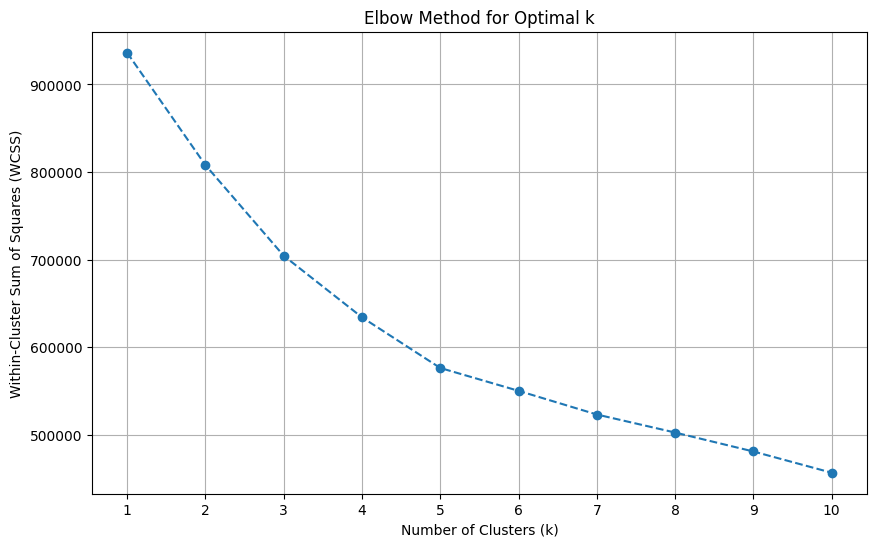

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

wcss = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve 
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [36]:
K = 5 

kmeans_final = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_final.fit(X_train_scaled)

cluster_labels = kmeans_final.labels_

clustered_df = pd.DataFrame({
    'Cluster': cluster_labels,
    'Log_Price': y_train.reset_index(drop=True) # Reset index to align with cluster_labels
})

print(f"Listings segmented into {K} clusters.")

print("Cluster Sizes")
print(clustered_df['Cluster'].value_counts())

Listings segmented into 5 clusters.
Cluster Sizes
Cluster
1    23398
2    15066
0    13908
4     5969
3      174
Name: count, dtype: int64


In [37]:
from scipy import stats


cluster_groups = [clustered_df['Log_Price'][clustered_df['Cluster'] == i] for i in range(K)]

f_statistic, p_value = stats.f_oneway(*cluster_groups)

print("ANOVA Test Results for Cluster Price Differences")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4e}")

alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject the Null Hypothesis (P-value < {alpha}).")
    print("The mean Log Price is **statistically significantly different** across the clusters.")
else:
    print(f"\nConclusion: Fail to Reject the Null Hypothesis (P-value > {alpha}).")
    print("There is no statistically significant difference in mean Log Price across the clusters.")

ANOVA Test Results for Cluster Price Differences
F-Statistic: 3446.3799
P-Value: 0.0000e+00

Conclusion: Reject the Null Hypothesis (P-value < 0.05).
The mean Log Price is **statistically significantly different** across the clusters.


In [38]:
X_train['Cluster'] = pd.Series(kmeans_final.labels_, index=X_train.index)
X_train['Log_Price'] = y_train

profile_features = [
    'Cluster', 
    'Log_Price', 
    'accommodates', 
    'bedrooms', 
    'bathrooms', 
    'zipcode_encoded'
]

cluster_profile = X_train[profile_features].groupby('Cluster').mean().sort_values(by='Log_Price')

print("Cluster Profile Analysis (Sorted by Mean Log Price)")
print(cluster_profile)

Cluster Profile Analysis (Sorted by Mean Log Price)
         Log_Price  accommodates  bedrooms  bathrooms  zipcode_encoded
Cluster                                                               
2         4.622369      2.709146  1.038431   1.131090         4.792179
1         4.654532      2.716301  1.077998   1.099068         4.739261
0         4.780948      2.443773  1.075424   1.116947         4.808989
3         4.999767      3.367816  1.275862   1.281609         4.812254
4         5.693659      7.593567  2.998995   2.291004         4.863785


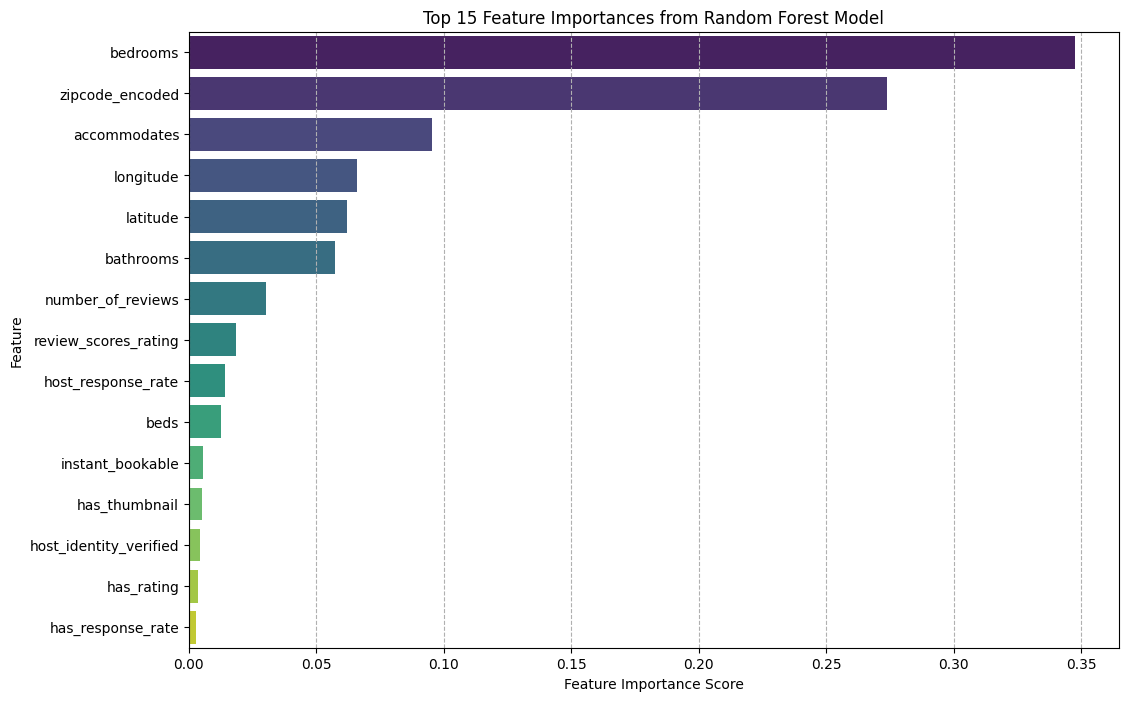

✅ Feature Importance chart generated successfully.

--- Top 5 Features ---
| Feature         |   Importance |
|:----------------|-------------:|
| bedrooms        |    0.3475    |
| zipcode_encoded |    0.27393   |
| accommodates    |    0.0952164 |
| longitude       |    0.0661195 |
| latitude        |    0.0618336 |


In [39]:
if 'Cluster' in X_train.columns:
    X_train_clean = X_train.drop(columns=['Cluster', 'Log_Price'], errors='ignore')
else:
    X_train_clean = X_train.copy()

importances = rf_model.feature_importances_

feature_names = X_train_clean.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from Random Forest Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--')
plt.show()

print("✅ Feature Importance chart generated successfully.")
print("\n--- Top 5 Features ---")
print(feature_importance_df.head(5).to_markdown(index=False))